In [46]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [48]:
model = keras.models.load_model('char&mnist_recog.h5')

In [49]:
label_mapper = {
	0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'
    ,30:'0', 31:'1', 32:'2', 33:'3', 34:'4', 35:'5', 36:'6', 37:'7', 38:'8', 39:'9'}

In [50]:
dataset = pd.read_csv("../../data/char&mnist.csv").astype('float32')

In [51]:
X = dataset.drop('label',axis = 1)
y = dataset['label']

In [52]:
# split data+labels
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = MinMaxScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

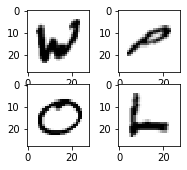

In [53]:
X_shuffle = shuffle(X)

plt.figure(figsize = (3,2.5), frameon=False)
plt.rcParams["axes.grid"] = False
row, col = 2, 2
for i in range(4):  
    plt.subplot(col, row, i+1)
    plt.imshow(
		X_shuffle.iloc[i].values.reshape(28,28),
		interpolation='nearest', cmap='Greys')
plt.show()

In [54]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [55]:
pred = model.predict(X_test)

4317/4317 [==============================] - 14s 3ms/step


In [56]:
random_list = []
random_numbers = []
for i in range(0,4):
    n = random.randint(0,X_test.shape[0])
    random_list.append(X_test[n].reshape(28,28))
    random_numbers.append(n)

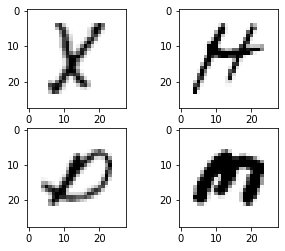

In [57]:
plt.figure(figsize = (5, 4), frameon=False)
plt.rcParams["axes.grid"] = False
plt.axis('off')
row, col = 2, 2
for i in range(4):  
    plt.subplot(col, row, i+1)
    plt.imshow(
		random_list[i].reshape(28,28),
		interpolation='nearest', cmap='Greys')
plt.show()

# PREDICTIONS

In [58]:

for i in range(0,4):
    print(label_mapper[pred[random_numbers[i]].argmax()])

X
H
D
M
